In [23]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Load your cleaned dataset
data = pd.read_csv('/Users/artemus/Documents/My_Projects/BritishAirways/data/cleaned_BA_reviews.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())




   Unnamed: 0                                            reviews  \
0           0  Not Verified |  A nightmare journey courtesy o...   
1           1  â Trip Verified | Absolutely atrocious. LHR-...   
2           2  â Trip Verified | As someone who flies relen...   
3           3  â Trip Verified |   Flew with British Airway...   
4           4  â Trip Verified |   Straightforward check in...   

                                     cleaned_reviews  \
0  verified nightmare journey courtesy british aw...   
1  trip verified absolutely atrocious lhrordlhr r...   
2  trip verified someone fly relentlessly british...   
3  trip verified flew british away club europe sa...   
4  trip verified straightforward check new site c...   

                                              tokens  
0  ['verified', 'nightmare', 'journey', 'courtesy...  
1  ['trip', 'verified', 'absolutely', 'atrocious'...  
2  ['trip', 'verified', 'someone', 'fly', 'relent...  
3  ['trip', 'verified', 'flew', 'b

[nltk_data] Downloading package punkt to /Users/artemus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/artemus/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [26]:
# Function to extract adjectives from a single review
def extract_adjectives(review):
    tokens = word_tokenize(review)
    tagged = pos_tag(tokens)
    adjectives = [word for word, pos in tagged if pos in ['JJ', 'JJR', 'JJS']]
    return adjectives

# Apply the function to the review_text column
data['adjectives'] = data['reviews'].apply(extract_adjectives)

# Display the first few rows with the extracted adjectives
print(data[['reviews', 'adjectives']].head())



                                             reviews  \
0  Not Verified |  A nightmare journey courtesy o...   
1  â Trip Verified | Absolutely atrocious. LHR-...   
2  â Trip Verified | As someone who flies relen...   
3  â Trip Verified |   Flew with British Airway...   
4  â Trip Verified |   Straightforward check in...   

                                          adjectives  
0  [British, worst, approx, alternative, fortunat...  
1  [â, atrocious, LHR-ORD-LHR, British, national...  
2          [â, exorbitant, outdated, primary, crew]  
3                      [â, late, late, rushed, due]  
4  [â, busy, good, full, inferior, busy, short, ...  


In [27]:
from collections import Counter

# Combine all adjectives into a single list
all_adjectives = [adj for sublist in data['adjectives'] for adj in sublist]

# Create a frequency distribution
adjective_freq = Counter(all_adjectives)

# Display the most common adjectives
print(adjective_freq.most_common(20))


[('â\x9c', 746), ('good', 378), ('British', 280), ('other', 255), ('due', 172), ('new', 161), ('first', 158), ('next', 142), ('same', 141), ('full', 139), ('more', 139), ('great', 132), ('last', 123), ('poor', 115), ('small', 113), ('comfortable', 110), ('many', 105), ('available', 100), ('long', 93), ('old', 93)]


In [29]:
df.to_csv('cleaned_BA_reviews_adj.csv', index=False)

(-0.5, 799.5, 399.5, -0.5)

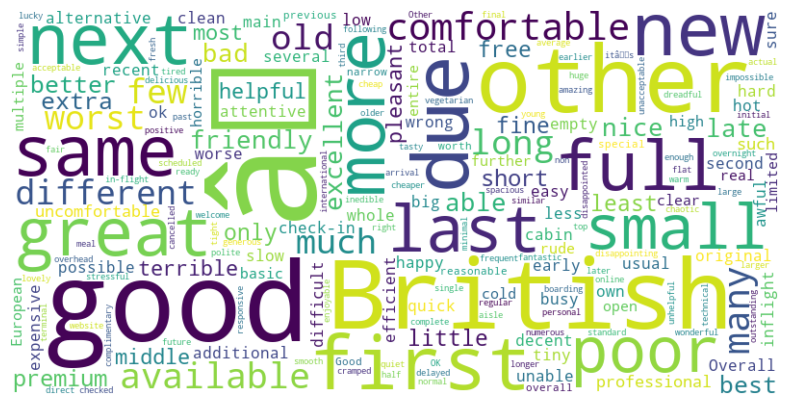

In [40]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Add custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['British', 'Airways'])  # Add words you want to exclude


# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(adjective_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')